# Deep Learning Seminar
## House Price Prediction with Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Data Reading and Data Overview

In [2]:
train_hpp = pd.read_csv ("C:/Users/ZulkifliIndraGadingC/OneDrive/HTW/DL/Project/train.csv")

In [3]:
train_hpp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Grouping the features based on their data type

In [5]:
#int, number but categorical
int_columns = ["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFullBath", "BsmtHalfBath",
               "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
               "GarageYrBlt", "GarageCars", "MoSold", "YrSold"]

#float or area
float_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                 "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea",
                 "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea","MiscVal"]

#categorical with order
ordinal_columns = ["OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtQual", "BsmtCond",
                   "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual",
                   "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC",
                   "Fence"]

#categorical without order (obj and int datatype)
obj_columns = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour",
               "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2",
               "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
               "MasVnrType", "ExterQual", "ExterCond", "Foundation", "Heating", "Electrical",
               "Functional", "GarageType", "MiscFeature", "SaleType", "SaleCondition"]

### Missing Value

In [6]:
# See the columns with missing value
train_hpp.isna().sum()[train_hpp.isna().sum() > 0].sort_values(ascending = False) 

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

#### Handling Missing Value
Not all missing value are missing value. Sometimes it means it doesn't have something (value = 0 or none)

In [7]:
#Column with true missing value only Electrical, GarageYrBlt and LotFrontage
cat_false_na = ["MasVnrType", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
            "GarageCond", "BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual",
            "MasVnrArea", "PoolQC", "MiscFeature", "Alley", "Fence"]#, "Fireplaces"]

##### Handling false NA in numerical data type

In [8]:
#Impute 0 in MasVnrArea
train_hpp["MasVnrArea"] = train_hpp["MasVnrArea"].fillna(value = 0, inplace = False)

##### Handling false NA in categorical data type

In [9]:
#Fillna with None
train_hpp[cat_false_na] = train_hpp[cat_false_na].fillna(value = "None", inplace = False)

#Check isna
train_hpp.isna().sum()[train_hpp.isna().sum() > 0].sort_values(ascending = False)

LotFrontage    259
GarageYrBlt     81
Electrical       1
dtype: int64

##### Handling true missing value

In [10]:
#Drop electrical
train_hpp.dropna(subset = ["Electrical"], inplace = True)

#Imputing LotFrontage with median
train_hpp["LotFrontage"] = train_hpp["LotFrontage"].fillna(train_hpp["LotFrontage"].median())

#Imputing GarageYrBlt with median
train_hpp["GarageYrBlt"] = train_hpp["GarageYrBlt"].fillna(train_hpp["GarageYrBlt"].median())

#Check isna
train_hpp.isna().sum()[train_hpp.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

In [11]:
# reset index
#train_hpp.reset_index(drop = True, inplace = True)

In [12]:
train_hpp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [13]:
train_hpp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallCond  

### Outlier

In [14]:
# all numeric columns
num_col = int_columns + float_columns

# Select only numerical features
num_features = train_hpp[num_col]

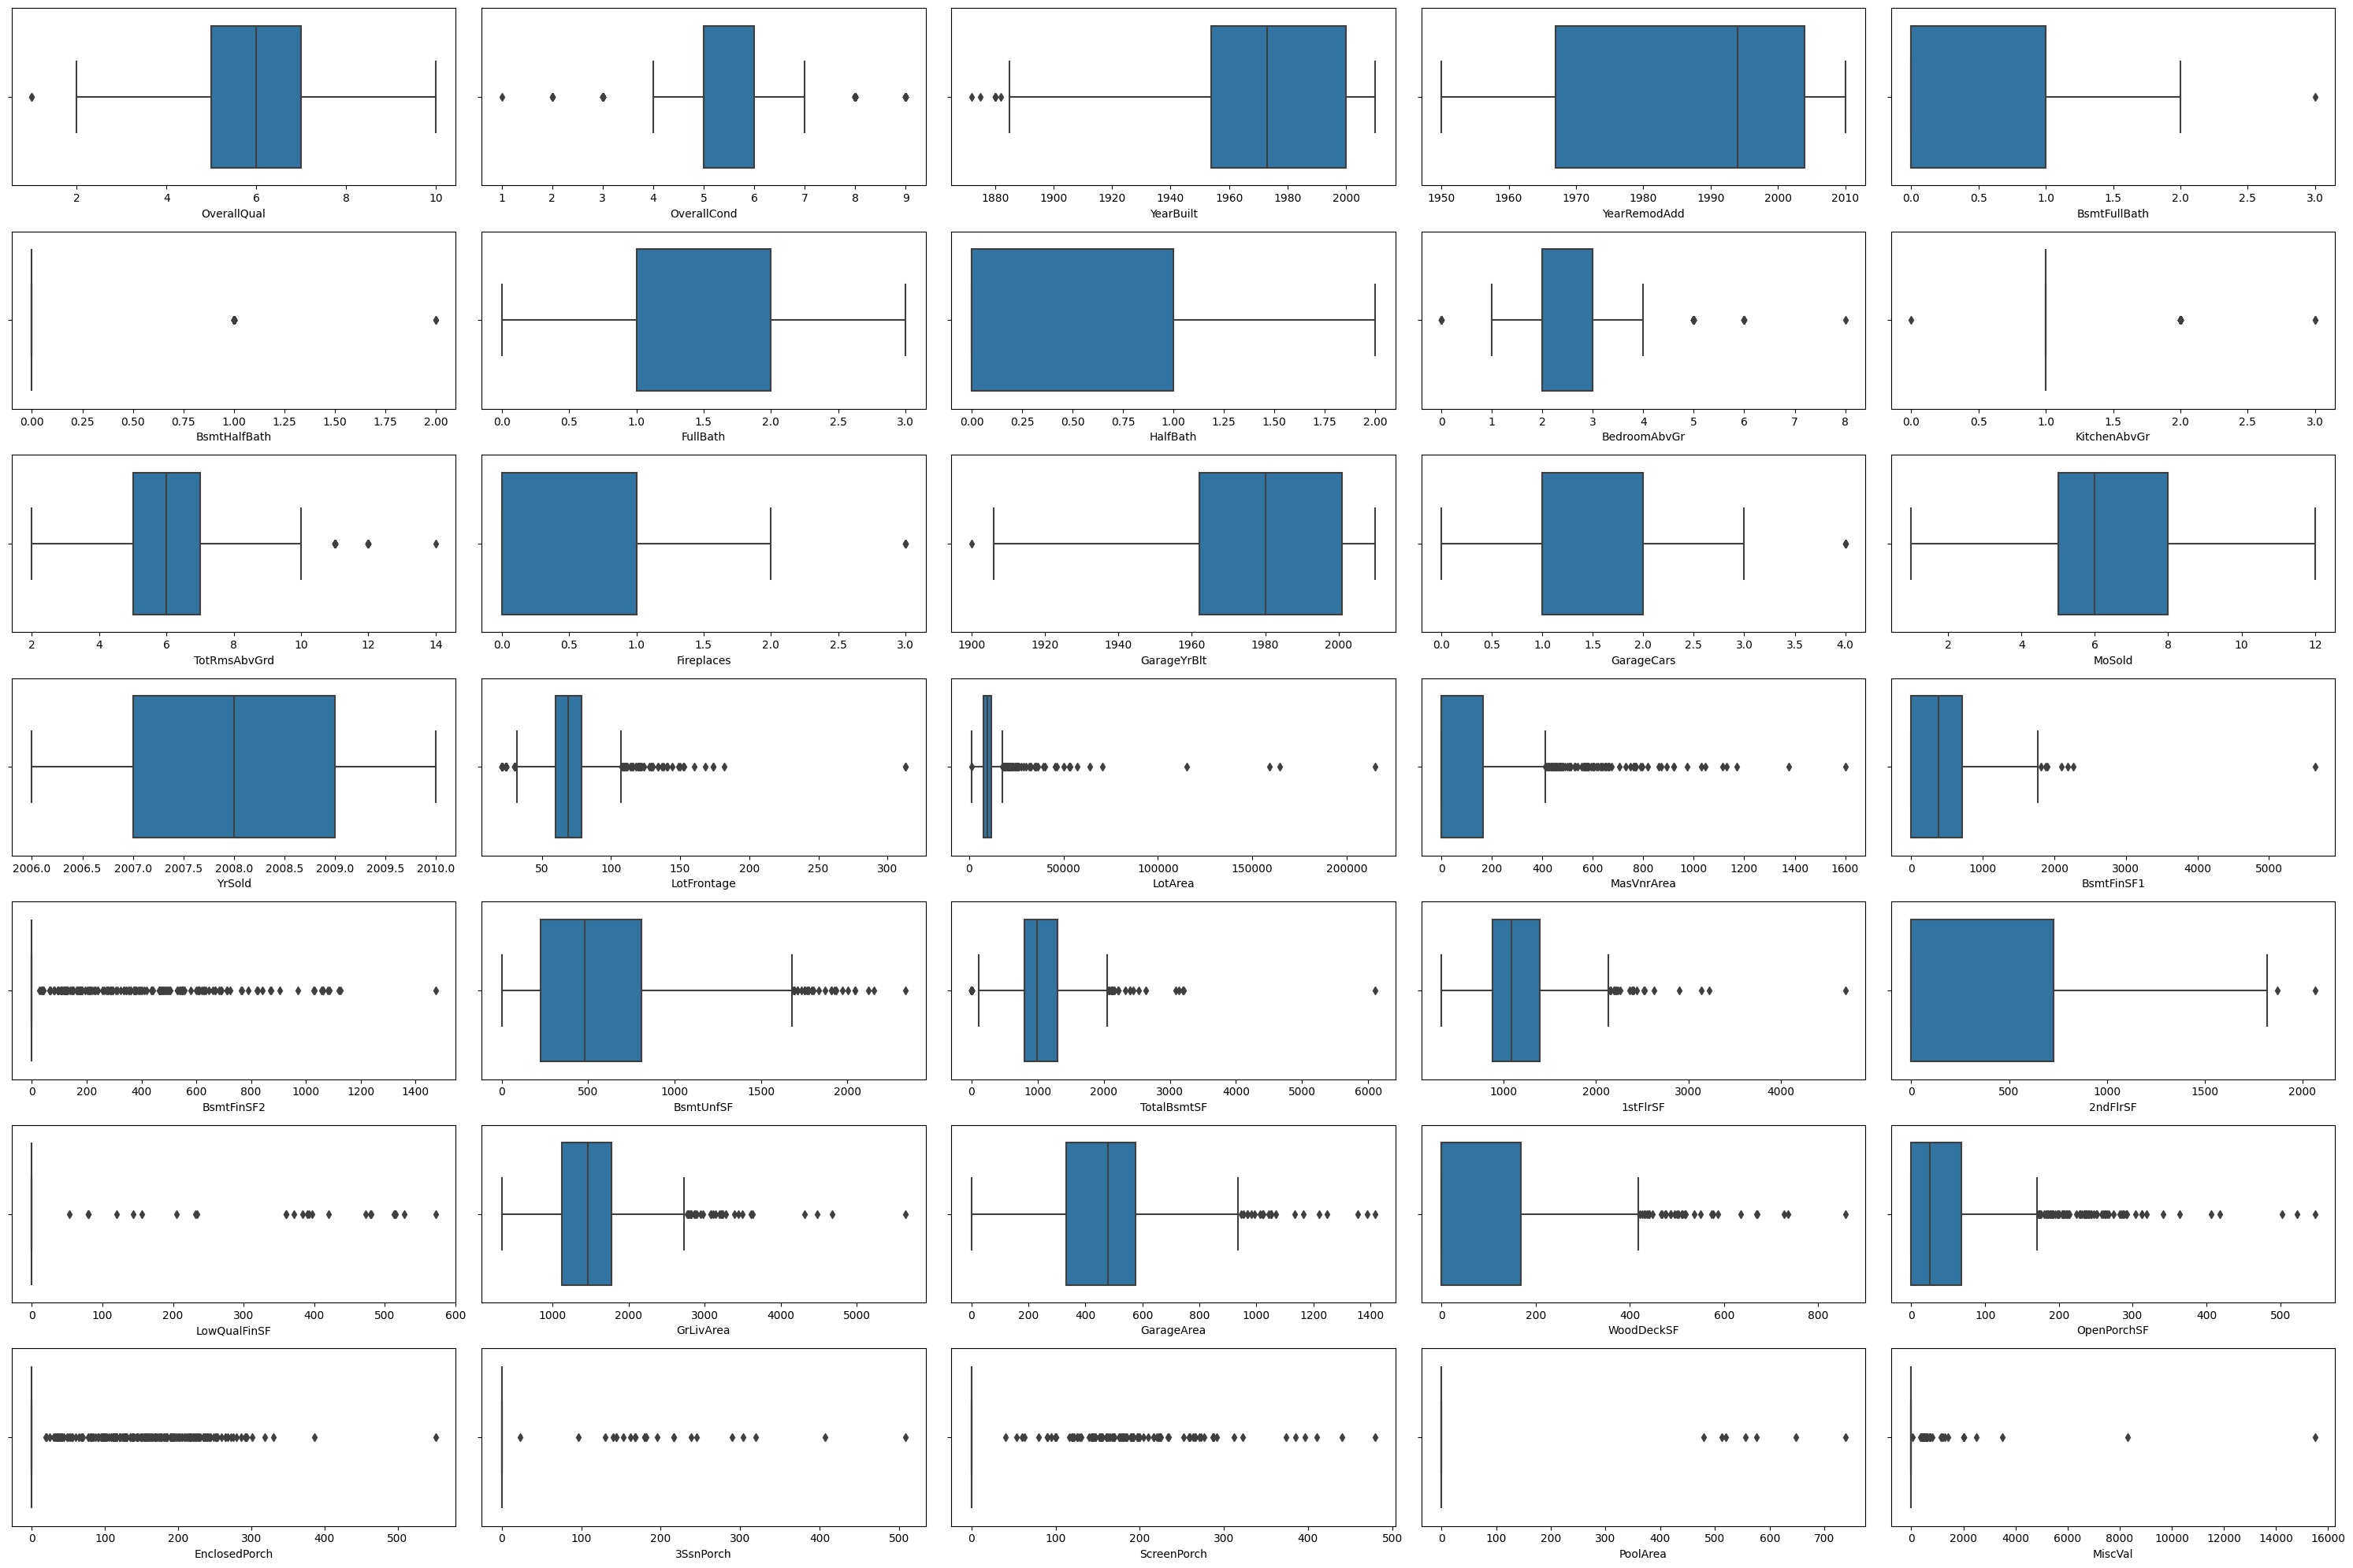

In [15]:
# See outlier with boxplot
# Layout of the plot
fig, axes = plt.subplots(nrows = 7, ncols = 5, figsize = (30,20))
axes = axes.flatten()

for i, col in enumerate(num_features.columns):
    if i < len(num_features):
        sns.boxplot(x = train_hpp[col], ax = axes[i])
        
for i in range(len(num_features.columns), len(axes)): 
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

#### Handling Outlier

In [16]:
#Droping column, thorse q1, q2 and q3 are zero.
train_hpp = train_hpp.drop(columns = ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch",
                                      "ScreenPorch", "PoolArea", "MiscVal"])

In [17]:
#Outlier Column
outlier_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF",
                "1stFlrSF", "2ndFlrSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF"]

In [18]:
#change the outlier column datatype to float
train_hpp[outlier_cols] = train_hpp[outlier_cols].astype(float)

#check info
train_hpp[outlier_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1459 non-null   float64
 1   LotArea      1459 non-null   float64
 2   MasVnrArea   1459 non-null   float64
 3   BsmtFinSF1   1459 non-null   float64
 4   BsmtUnfSF    1459 non-null   float64
 5   TotalBsmtSF  1459 non-null   float64
 6   1stFlrSF     1459 non-null   float64
 7   2ndFlrSF     1459 non-null   float64
 8   GrLivArea    1459 non-null   float64
 9   GarageArea   1459 non-null   float64
 10  WoodDeckSF   1459 non-null   float64
 11  OpenPorchSF  1459 non-null   float64
dtypes: float64(12)
memory usage: 148.2 KB


In [19]:
#Change the outlier value with IQR Methode

def handle_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    dataframe.loc[(dataframe[col] > upper,col)]=upper
    dataframe.loc[(dataframe[col] < lower,col)]=lower 
    
    return dataframe

for col in train_hpp[outlier_cols].columns :
    train_hpp = handle_outliers_iqr(train_hpp, col)

train_hpp[outlier_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
0,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,548.0,0.0,61.0
1,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,460.0,298.0,0.0
2,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,608.0,0.0,42.0
3,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,642.0,0.0,35.0
4,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,836.0,192.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917.0,0.0,0.0,953.0,953.0,953.0,694.0,1647.0,460.0,0.0,40.0
1456,85.0,13175.0,119.0,790.0,589.0,1542.0,2073.0,0.0,2073.0,500.0,349.0,0.0
1457,66.0,9042.0,0.0,275.0,877.0,1152.0,1188.0,1152.0,2340.0,252.0,0.0,60.0
1458,68.0,9717.0,0.0,49.0,0.0,1078.0,1078.0,0.0,1078.0,240.0,366.0,0.0


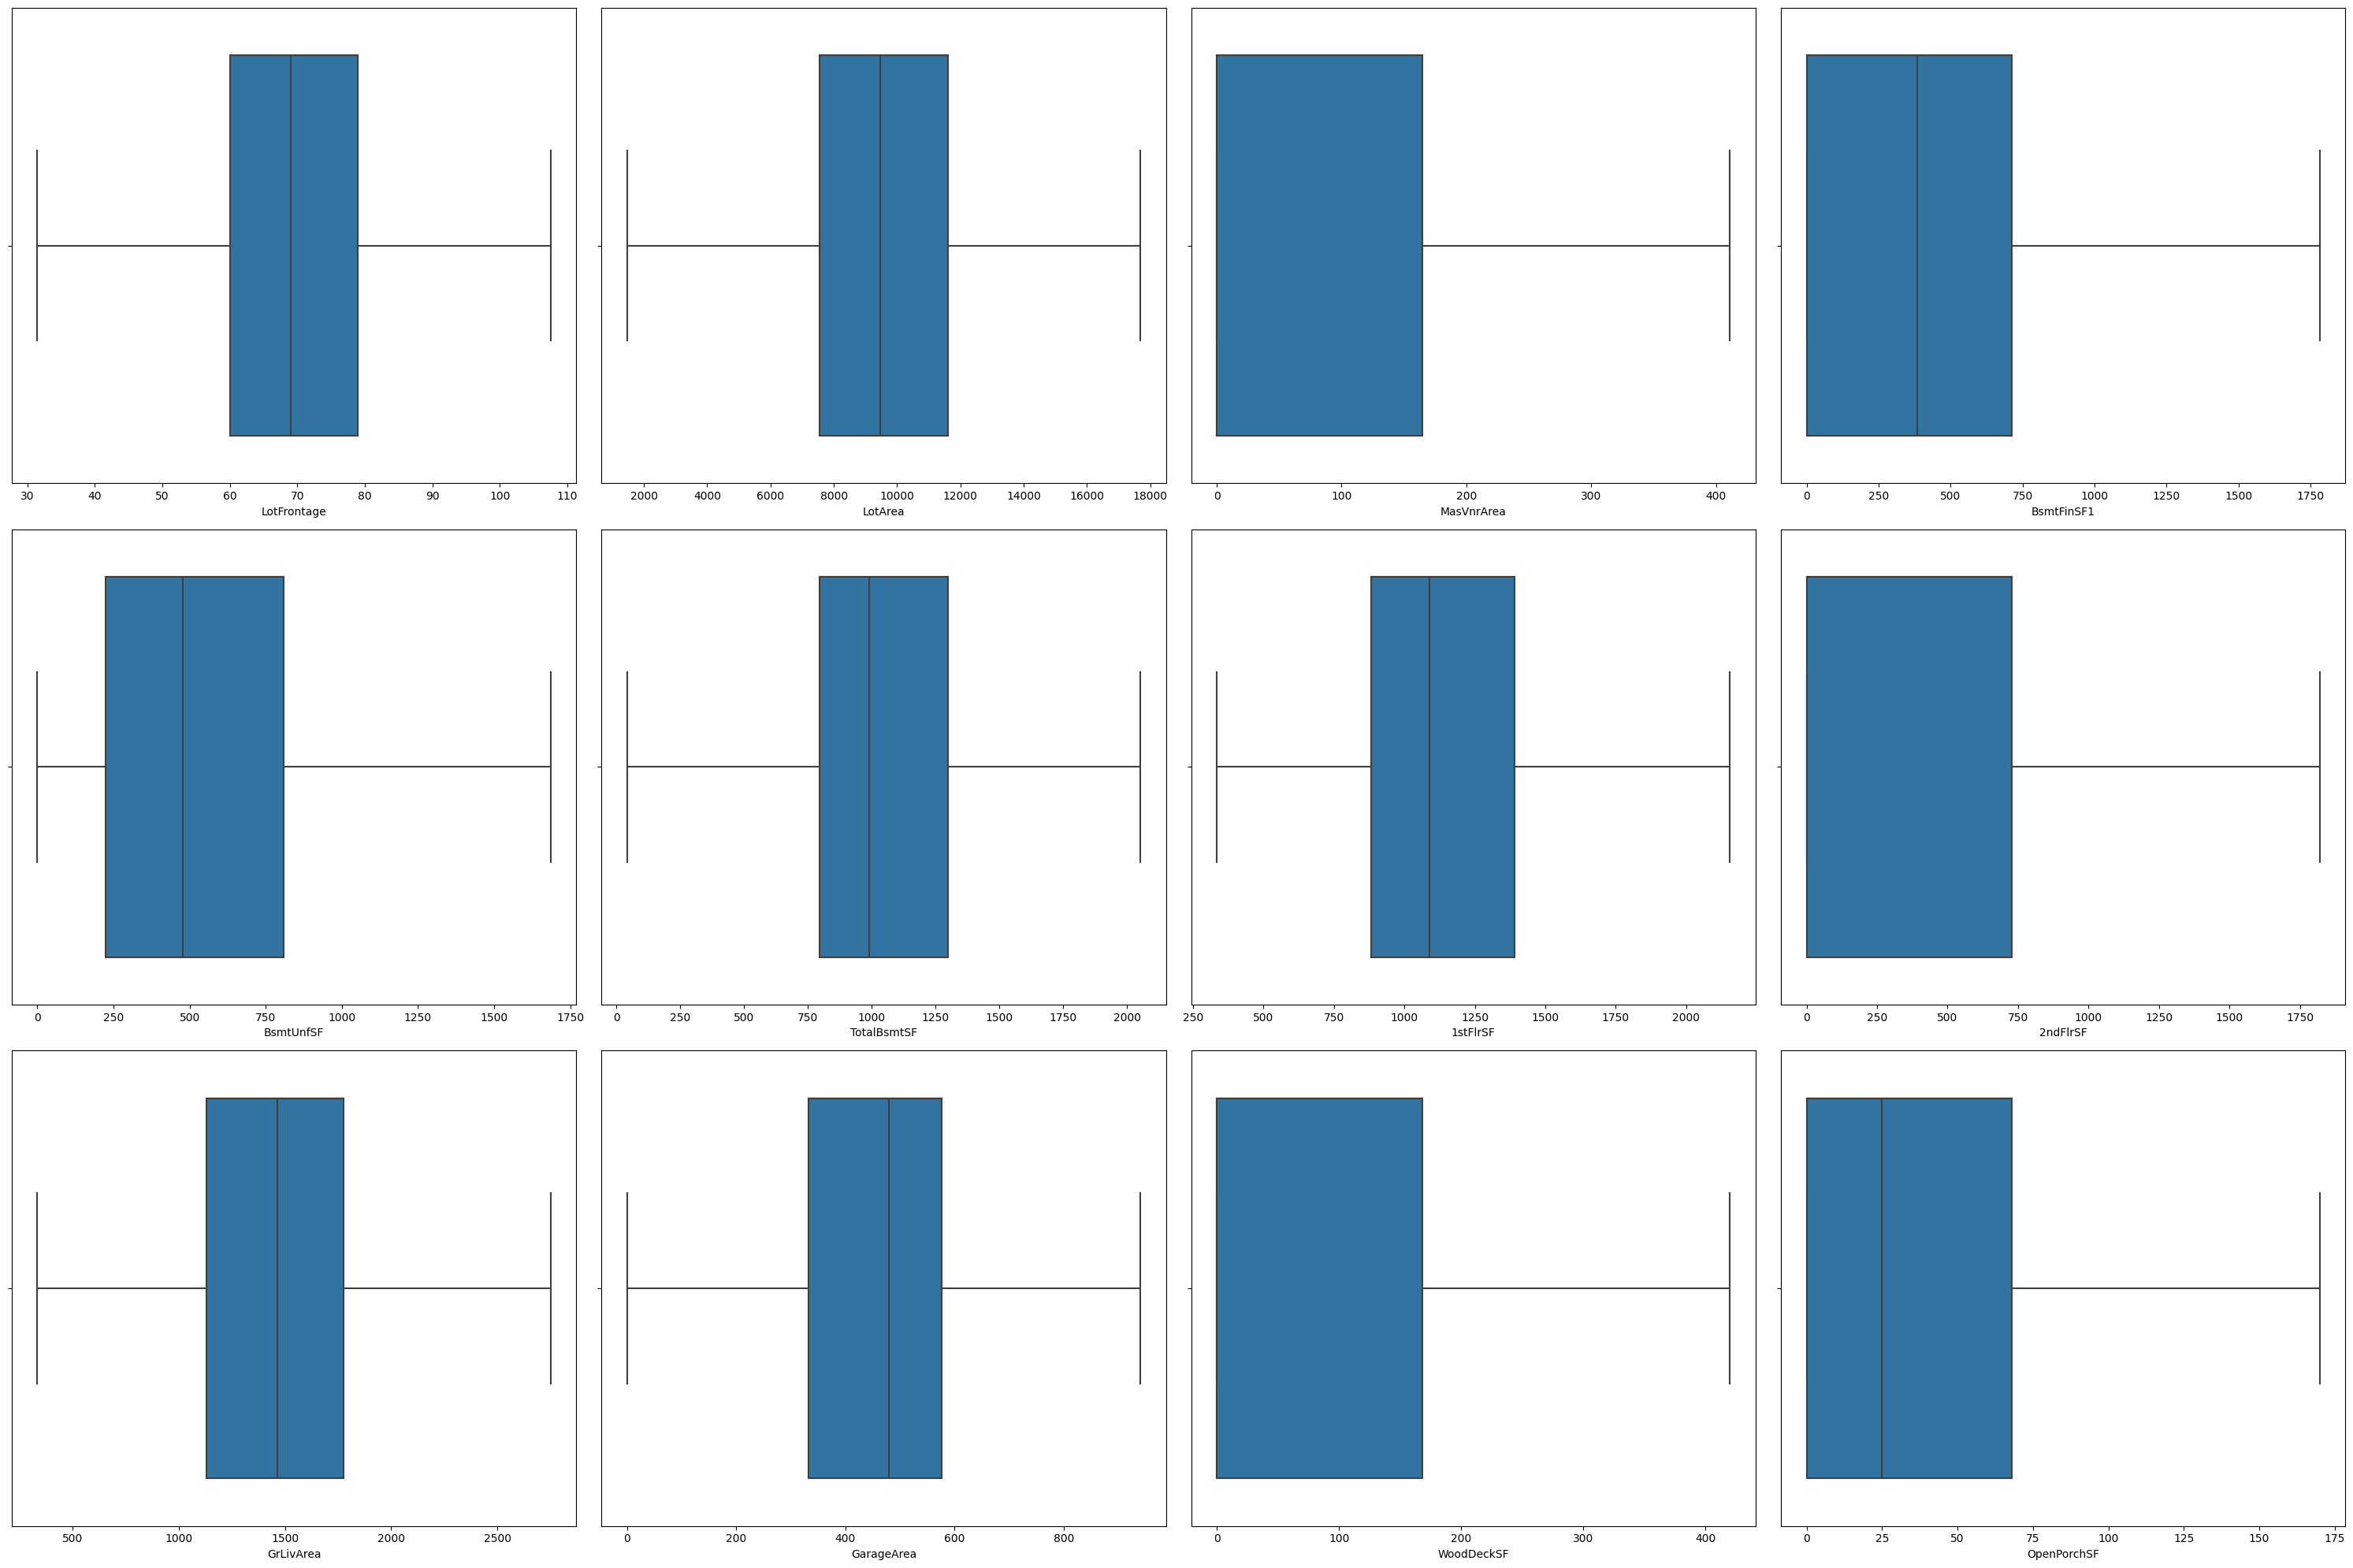

In [20]:
#check with boxplot
outlier_df = train_hpp[outlier_cols]

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (30,20))
axes = axes.flatten()

for i, col in enumerate(outlier_df.columns):
    if i < len(outlier_df):
        sns.boxplot(x = train_hpp[col], ax = axes[i])
        
for i in range(len(num_features.columns), len(axes)): 
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()

### Encoding for categorical features

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [22]:
#checking categorical features
cat = train_hpp.select_dtypes(include = "O").keys()
cat
len(cat)

43

#### Encoding the categorical features without order

In [23]:
cat_non_ordinal = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities",
                   "LotConfig", "LandSlope","Neighborhood", "Condition1", "Condition2", "BldgType",
                   "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Alley",
                   "MasVnrType", "Foundation", "Heating", "CentralAir", "Electrical", "Functional",
                   "GarageType", "PavedDrive", "SaleType", "SaleCondition", "MiscFeature"]#, "Fence"]

len(cat_non_ordinal)

29

In [24]:
#DataFrame for later to check if code is right
hpp_non_ordinal = train_hpp[cat_non_ordinal]

In [25]:
label_encoder = LabelEncoder()

#LabelEncoder for all non ordinal category columns
for col in cat_non_ordinal:
    train_hpp[col] = label_encoder.fit_transform(train_hpp[col])

#check
print(train_hpp.MSSubClass.value_counts())
print(hpp_non_ordinal.MSSubClass.value_counts())

print(train_hpp.MSZoning.value_counts())
print(hpp_non_ordinal.MSZoning.value_counts())

print(train_hpp.Street.value_counts())
print(hpp_non_ordinal.Street.value_counts())

print(train_hpp.LotShape.value_counts())
print(hpp_non_ordinal.LotShape.value_counts())

MSSubClass
0     536
5     299
4     144
11     87
1      69
12     63
6      60
8      57
10     52
14     30
9      20
7      16
3      12
13     10
2       4
Name: count, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      57
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
MSZoning
3    1150
4     218
1      65
2      16
0      10
Name: count, dtype: int64
MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
1    1453
0       6
Name: count, dtype: int64
Street
Pave    1453
Grvl       6
Name: count, dtype: int64
LotShape
3    924
0    484
1     41
2     10
Name: count, dtype: int64
LotShape
Reg    924
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


#### Encoding for categorical features with order

In [26]:
#ordinal columns
hpp_ordinal = train_hpp[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
                        "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
                        "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",
                        "GarageCond", "PoolQC", "Fence"]]

In [27]:
##cat1
cat1 = ["Po", "Fa", "TA", "Gd", "Ex"]
enc1 = OrdinalEncoder(categories = [cat1])

ord_cat1 = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

for col in ord_cat1:
    reshaped_data = train_hpp[col].values.reshape(-1, 1)
    train_hpp[col] = enc1.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal[ord_cat1].apply(pd.value_counts))
print(train_hpp[ord_cat1].apply(pd.value_counts))

    ExterQual  ExterCond  HeatingQC  KitchenQual
Ex       52.0          3        741        100.0
Fa       14.0         28         49         39.0
Gd      488.0        146        240        585.0
Po        NaN          1          1          NaN
TA      905.0       1281        428        735.0
     ExterQual  ExterCond  HeatingQC  KitchenQual
0.0        NaN          1          1          NaN
1.0       14.0         28         49         39.0
2.0      905.0       1281        428        735.0
3.0      488.0        146        240        585.0
4.0       52.0          3        741        100.0


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2563003652.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2563003652.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2563003652.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2563003652.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj

In [28]:
##cat2
cat2 = ["None", "Po", "Fa", "TA", "Gd", "Ex"]
enc2 = OrdinalEncoder(categories = [cat2])

ord_cat2 = ["BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]
            #"ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

for col in ord_cat2:
    reshaped_data = train_hpp[col].values.reshape(-1, 1)
    train_hpp[col] = enc2.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal[ord_cat2].apply(pd.value_counts))
print(train_hpp[ord_cat2].apply(pd.value_counts))

      BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  PoolQC
Ex       121.0       NaN           24           3           2     2.0
Fa        35.0      45.0           33          48          35     2.0
Gd       617.0      65.0          380          14           9     3.0
None      37.0      37.0          689          81          81  1452.0
Po         NaN       2.0           20           3           7     NaN
TA       649.0    1310.0          313        1310        1325     NaN
     BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  PoolQC
0.0      37.0      37.0          689          81          81  1452.0
1.0       NaN       2.0           20           3           7     NaN
2.0      35.0      45.0           33          48          35     2.0
3.0     649.0    1310.0          313        1310        1325     NaN
4.0     617.0      65.0          380          14           9     3.0
5.0     121.0       NaN           24           3           2     2.0


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\944483440.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\944483440.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\944483440.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\944483440.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).va

In [29]:
##cat3
cat3 = ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
enc3 = OrdinalEncoder(categories = [cat3])

ord_cat3 = ["BsmtFinType1", "BsmtFinType2"]

for col in ord_cat3:
    reshaped_data = train_hpp[col].values.reshape(-1, 1)
    train_hpp[col] = enc3.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal[ord_cat3].apply(pd.value_counts))
print(train_hpp[ord_cat3].apply(pd.value_counts))

      BsmtFinType1  BsmtFinType2
ALQ            220            19
BLQ            148            33
GLQ            418            14
LwQ             74            46
None            37            38
Rec            133            54
Unf            429          1255
     BsmtFinType1  BsmtFinType2
0.0            37            38
1.0           429          1255
2.0            74            46
3.0           133            54
4.0           148            33
5.0           220            19
6.0           418            14


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\1813528924.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat3].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\1813528924.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal[ord_cat3].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\1813528924.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(train_hpp[ord_cat3].apply(pd.value_counts))


In [30]:
##cat4 BsmtExposure
cat4 = ["None", "No", "Mn", "Av", "Gd"]
enc4 = OrdinalEncoder(categories = [cat4])

train_hpp["BsmtExposure"] = enc4.fit_transform(train_hpp[["BsmtExposure"]])

#check if it is right
print(hpp_ordinal["BsmtExposure"].value_counts())
print(train_hpp["BsmtExposure"].value_counts())

BsmtExposure
No      952
Av      221
Gd      134
Mn      114
None     38
Name: count, dtype: int64
BsmtExposure
1.0    952
3.0    221
4.0    134
2.0    114
0.0     38
Name: count, dtype: int64


In [31]:
##cat5 GarageFinish
cat5 = ["None", "Unf", "RFn", "Fin"]
enc5 = OrdinalEncoder(categories = [cat5])

train_hpp["GarageFinish"] = enc5.fit_transform(train_hpp[["GarageFinish"]])

#check if it is right
print(hpp_ordinal["GarageFinish"].value_counts())
print(train_hpp["GarageFinish"].value_counts())

GarageFinish
Unf     605
RFn     422
Fin     351
None     81
Name: count, dtype: int64
GarageFinish
1.0    605
2.0    422
3.0    351
0.0     81
Name: count, dtype: int64


In [32]:
##cat6 GarageFinish
cat6 = ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"]
enc6 = OrdinalEncoder(categories = [cat6])

train_hpp["Fence"] = enc6.fit_transform(train_hpp[["Fence"]])

#check if it is right
print(hpp_ordinal["Fence"].value_counts())
print(train_hpp["Fence"].value_counts())

Fence
None     1178
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64
Fence
0.0    1178
3.0     157
4.0      59
2.0      54
1.0      11
Name: count, dtype: int64


In [33]:
#see if all the features now have int or float data type 
cat = train_hpp.select_dtypes(include = "O").keys()
cat

Index([], dtype='object')

## Handle the test dataset

In [35]:
test_df1 = pd.read_csv ("C:/Users/ZulkifliIndraGadingC/OneDrive/HTW/DL/Project/test.csv")
test_df2 = pd.read_csv ("C:/Users/ZulkifliIndraGadingC/OneDrive/HTW/DL/Project/sample_submission.csv")

In [36]:
test_hpp = pd.merge(test_df1, test_df2, on = "Id")
test_hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [37]:
test_hpp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [38]:
#Drop column that have been dropped in train dataset
test_hpp = test_hpp.drop(columns = ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch",
                                    "ScreenPorch", "PoolArea", "MiscVal"])

#"PoolQC", "MiscFeature", "Alley", "Fence"
#Check Nan
test_hpp.isna().sum()[test_hpp.isna().sum() > 0].sort_values(ascending = False)


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
BsmtUnfSF          1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [39]:
#Drop Na Value < 79
test_hpp.dropna(subset = ["GarageYrBlt"], inplace = True)
test_hpp.dropna(subset = ["BsmtCond"], inplace = True)
test_hpp.dropna(subset = ["MasVnrArea"], inplace = True)
test_hpp.dropna(subset = ["BsmtQual"], inplace = True)
test_hpp.dropna(subset = ["BsmtExposure"], inplace = True)
test_hpp.dropna(subset = ["MSZoning"], inplace = True)

droptest = ["Utilities", "KitchenQual", "Functional", "SaleType"]
test_hpp.dropna(subset = droptest, inplace = True) 

In [40]:
test_hpp.isna().sum()[test_hpp.isna().sum() > 0].sort_values(ascending = False)

PoolQC         1317
MiscFeature    1276
Alley          1228
Fence          1051
MasVnrType      771
FireplaceQu     623
LotFrontage     211
dtype: int64

In [41]:
# Impute the LotFrontage with median and the others two columns with None
test_hpp["LotFrontage"] = test_hpp["LotFrontage"].fillna(test_hpp["LotFrontage"].median())

None_Val = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu"]
test_hpp[None_Val] = test_hpp[None_Val].fillna(value = "None", inplace = False)

#check NA
test_hpp.isna().sum()[test_hpp.isna().sum() > 0].sort_values(ascending = False)

Series([], dtype: int64)

### Encoding test dataset

In [42]:
## Encoding ##

cat_test = test_hpp.select_dtypes(include = "O").keys()
len(cat_test)

43

In [43]:
cat_non_ordinal = ["MSSubClass", "MSZoning", "Street", "LotShape", "LandContour", "Utilities",
                   "LotConfig", "LandSlope","Neighborhood", "Condition1", "Condition2", "BldgType",
                   "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "Alley",
                   "MasVnrType", "Foundation", "Heating", "CentralAir", "Electrical", "Functional",
                   "GarageType", "PavedDrive", "SaleType", "SaleCondition", "MiscFeature"]#, "Fence"]

len(cat_non_ordinal)

29

In [44]:
#later to check if code is right
hpp_non_ordinal_test = test_hpp[cat_non_ordinal]

In [45]:
test_hpp[cat_non_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1320 non-null   int64 
 1   MSZoning       1320 non-null   object
 2   Street         1320 non-null   object
 3   LotShape       1320 non-null   object
 4   LandContour    1320 non-null   object
 5   Utilities      1320 non-null   object
 6   LotConfig      1320 non-null   object
 7   LandSlope      1320 non-null   object
 8   Neighborhood   1320 non-null   object
 9   Condition1     1320 non-null   object
 10  Condition2     1320 non-null   object
 11  BldgType       1320 non-null   object
 12  HouseStyle     1320 non-null   object
 13  RoofStyle      1320 non-null   object
 14  RoofMatl       1320 non-null   object
 15  Exterior1st    1320 non-null   object
 16  Exterior2nd    1320 non-null   object
 17  Alley          1320 non-null   object
 18  MasVnrType     1320 non-null   ob

In [46]:
label_encoder = LabelEncoder()

#LabelEncoder for all non ordinal category columns
for col in cat_non_ordinal:
    test_hpp[col] = label_encoder.fit_transform(test_hpp[col])

#check
print(test_hpp.MSSubClass.value_counts())
print(hpp_non_ordinal_test.MSSubClass.value_counts())

print(test_hpp.MSZoning.value_counts())
print(hpp_non_ordinal_test.MSZoning.value_counts())

print(test_hpp.Street.value_counts())
print(hpp_non_ordinal_test.Street.value_counts())

print(test_hpp.LotShape.value_counts())
print(hpp_non_ordinal_test.LotShape.value_counts())

MSSubClass
0     502
5     267
4     127
11     94
13     59
6      59
8      57
1      55
10     32
9      25
15     21
7       7
3       6
14      6
2       2
12      1
Name: count, dtype: int64
MSSubClass
20     502
60     267
50     127
120     94
160     59
70      59
80      57
30      55
90      32
85      25
190     21
75       7
45       6
180      6
40       2
150      1
Name: count, dtype: int64
MSZoning
3    1032
4     205
1      69
2       9
0       5
Name: count, dtype: int64
MSZoning
RL         1032
RM          205
FV           69
RH            9
C (all)       5
Name: count, dtype: int64
Street
1    1316
0       4
Name: count, dtype: int64
Street
Pave    1316
Grvl       4
Name: count, dtype: int64
LotShape
3    821
0    461
1     33
2      5
Name: count, dtype: int64
LotShape
Reg    821
IR1    461
IR2     33
IR3      5
Name: count, dtype: int64


In [47]:
#ordinal columns
hpp_ordinal_test = test_hpp[["ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
                        "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC",
                        "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual",
                        "GarageCond", "PoolQC", "Fence"]]

In [48]:
##cat1
cat1 = ["Po", "Fa", "TA", "Gd", "Ex"]
enc1 = OrdinalEncoder(categories = [cat1])

ord_cat1 = ["ExterQual", "ExterCond", "HeatingQC", "KitchenQual"]

for col in ord_cat1:
    reshaped_data = test_hpp[col].values.reshape(-1, 1)
    test_hpp[col] = enc1.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal_test[ord_cat1].apply(pd.value_counts))
print(test_hpp[ord_cat1].apply(pd.value_counts))

    ExterQual  ExterCond  HeatingQC  KitchenQual
Ex       54.0          8        704         99.0
Fa        9.0         26         31         23.0
Gd      467.0        140        213        534.0
Po        NaN          1          1          NaN
TA      790.0       1145        371        664.0
     ExterQual  ExterCond  HeatingQC  KitchenQual
0.0        NaN          1          1          NaN
1.0        9.0         26         31         23.0
2.0      790.0       1145        371        664.0
3.0      467.0        140        213        534.0
4.0       54.0          8        704         99.0


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\4213809270.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\4213809270.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\4213809270.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat1].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\4213809270.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Us

In [49]:
##cat2
cat2 = ["None", "Po", "Fa", "TA", "Gd", "Ex"]
enc2 = OrdinalEncoder(categories = [cat2])

ord_cat2 = ["BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

for col in ord_cat2:
    reshaped_data = test_hpp[col].values.reshape(-1, 1)
    test_hpp[col] = enc2.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal_test[ord_cat2].apply(pd.value_counts))
print(test_hpp[ord_cat2].apply(pd.value_counts))

      BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  PoolQC
Ex       131.0       NaN           18         NaN         1.0     2.0
Fa        42.0      46.0           40        68.0        32.0     NaN
Gd       561.0      53.0          344        10.0         5.0     1.0
None       NaN       NaN          623         NaN         NaN  1317.0
Po         NaN       1.0           25         1.0         6.0     NaN
TA       586.0    1220.0          270      1241.0      1276.0     NaN
     BsmtQual  BsmtCond  FireplaceQu  GarageQual  GarageCond  PoolQC
0.0       NaN       NaN          623         NaN         NaN  1317.0
1.0       NaN       1.0           25         1.0         6.0     NaN
2.0      42.0      46.0           40        68.0        32.0     NaN
3.0     586.0    1220.0          270      1241.0      1276.0     NaN
4.0     561.0      53.0          344        10.0         5.0     1.0
5.0     131.0       NaN           18         NaN         1.0     2.0


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\107549150.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\107549150.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\107549150.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat2].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\107549150.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd

In [50]:
##cat3
cat3 = ["None", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"]
enc3 = OrdinalEncoder(categories = [cat3])

ord_cat3 = ["BsmtFinType1", "BsmtFinType2"]

for col in ord_cat3:
    reshaped_data = test_hpp[col].values.reshape(-1, 1)
    test_hpp[col] = enc3.fit_transform(reshaped_data)

#check if it is right
print(hpp_ordinal_test[ord_cat3].apply(pd.value_counts))
print(test_hpp[ord_cat3].apply(pd.value_counts))

     BsmtFinType1  BsmtFinType2
ALQ           201            32
BLQ           117            34
GLQ           414            20
LwQ            78            41
Rec           149            49
Unf           361          1144
     BsmtFinType1  BsmtFinType2
1.0           361          1144
2.0            78            41
3.0           149            49
4.0           117            34
5.0           201            32
6.0           414            20


C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2921730565.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat3].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2921730565.py:12: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(hpp_ordinal_test[ord_cat3].apply(pd.value_counts))
C:\Users\ZulkifliIndraGadingC\AppData\Local\Temp\ipykernel_12248\2921730565.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(test_hpp[ord_cat3].apply(pd.value_counts))


In [51]:
##cat4 BsmtExposure
cat4 = ["None", "No", "Mn", "Av", "Gd"]
enc4 = OrdinalEncoder(categories = [cat4])

test_hpp["BsmtExposure"] = enc4.fit_transform(test_hpp[["BsmtExposure"]])

#check if it is right
print(hpp_ordinal_test["BsmtExposure"].value_counts())
print(test_hpp["BsmtExposure"].value_counts())

BsmtExposure
No    880
Av    183
Gd    139
Mn    118
Name: count, dtype: int64
BsmtExposure
1.0    880
3.0    183
4.0    139
2.0    118
Name: count, dtype: int64


In [52]:
##cat5 GarageFinish
cat5 = ["None", "Unf", "RFn", "Fin"]
enc5 = OrdinalEncoder(categories = [cat5])

test_hpp["GarageFinish"] = enc5.fit_transform(test_hpp[["GarageFinish"]])

#check if it is right
print(hpp_ordinal_test["GarageFinish"].value_counts())
print(test_hpp["GarageFinish"].value_counts())

GarageFinish
Unf    589
RFn    377
Fin    354
Name: count, dtype: int64
GarageFinish
1.0    589
2.0    377
3.0    354
Name: count, dtype: int64


In [53]:
##cat6 Fence
cat6 = ["None", "MnWw", "GdWo", "MnPrv", "GdPrv"]
enc6 = OrdinalEncoder(categories = [cat6])

test_hpp["Fence"] = enc6.fit_transform(test_hpp[["Fence"]])

#check if it is right
print(hpp_ordinal_test["Fence"].value_counts())
print(test_hpp["Fence"].value_counts())

Fence
None     1051
MnPrv     161
GdPrv      55
GdWo       52
MnWw        1
Name: count, dtype: int64
Fence
0.0    1051
3.0     161
4.0      55
2.0      52
1.0       1
Name: count, dtype: int64


## Neural Network Model

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import Adam

In [56]:
X_train = train_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)
#X_train = X_train.astype(float)
y_train = train_hpp['SalePrice']
#y_train = y_train.astype(float)

In [57]:
X_test = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)
#X_test = X_test.astype(float)
y_test = test_hpp["SalePrice"]

In [58]:
NN_model = Sequential()
NN_model.add(Dense(100, activation = "relu", input_dim = X_train.shape[1:][0]))
NN_model.add(Dense(50,activation = "relu"))
NN_model.add(Dense(1, activation = "linear"))
NN_model.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history = NN_model.fit(X_train, y_train, epochs = 25)



Epoch 1/25

46/46 [==============================] - 1s 2ms/step - loss: 34962604032.0000
Epoch 2/25
46/46 [==============================] - 0s 2ms/step - loss: 18937956352.0000
Epoch 3/25
46/46 [==============================] - 0s 2ms/step - loss: 4716284416.0000
Epoch 4/25
46/46 [==============================] - 0s 2ms/step - loss: 4045540864.0000
Epoch 5/25
46/46 [==============================] - 0s 3ms/step - loss: 3911441920.0000
Epoch 6/25
46/46 [==============================] - 0s 3ms/step - loss: 3761192960.0000
Epoch 7/25
46/46 [==============================] - 0s 3ms/step - loss: 3607258368.0000
Epoch 8/25
46/46 [==============================] - 0s 3ms/step - loss: 3423108096.0000
Epoch 9/25
46/46 [==============================] - 0s 2ms/step - loss: 3229111808.0000
Epoch 10/25
46/46 [==============================] - 0s 2ms/step - loss: 3011698944.0000
Epoch 11/25
46/46 [==============================] - 0s 2ms/step - loss: 2802041344.0000
Epoch 12/25
46/46 [======

In [59]:
predictions = NN_model.predict(X_test)
#print(predictions[:10])
#print(y_test[:10])
predicted_values_series = pd.Series(predictions.flatten(), name='Predicted Values')
pred_actual = pd.concat([predicted_values_series, y_test], axis =  1)
pred_actual = pred_actual.dropna()
print(pred_actual)

42/42 [==============================] - 0s 2ms/step
      Predicted Values      SalePrice
0        134832.421875  169277.052498
1        199564.687500  187758.393989
2        194176.125000  183583.683570
3        194141.796875  179317.477511
4        160059.937500  150730.079977
...                ...            ...
1315     156446.234375  182164.266854
1316      98026.742188  188137.901598
1317      96928.757812  158893.543063
1318     205859.500000  189579.650668
1319     237503.703125  165229.803506

[1199 rows x 2 columns]


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = predictions

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 4224925033.358688
Root Mean Squared Error (RMSE): 64999.42333097031
Mean Absolute Error (MAE): 47981.26673251824


### The Loss Function

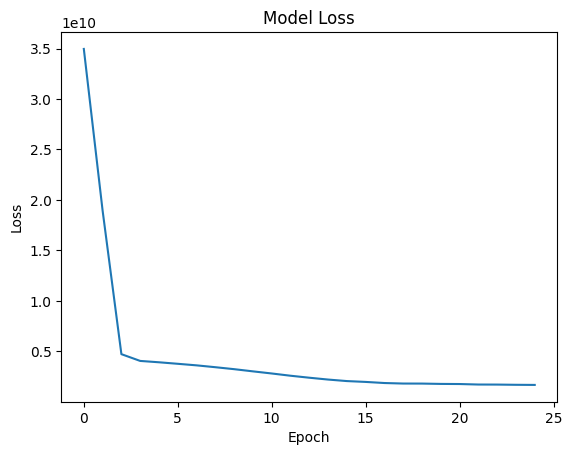

In [63]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Delete outlier in SalePrice

Now we want to take a closer look in SalePrice and want to delete the outlier too.  
Maybe it will lead to better results.

## SP1 drop outlier in train_hpp.SalePrice and test_hpp.SalePrice stay

C:\Users\ZulkifliIndraGadingC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


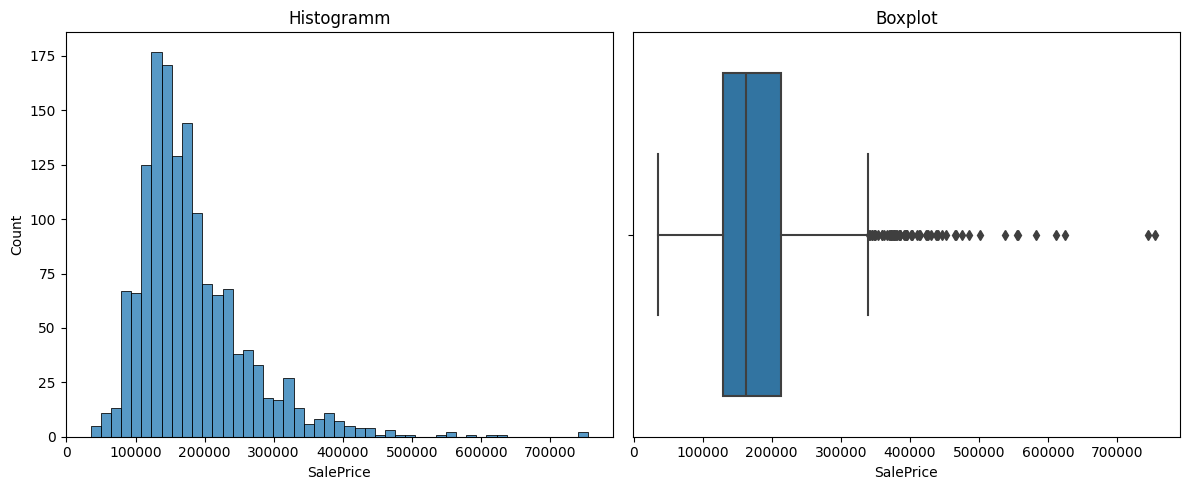

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.histplot(x = train_hpp["SalePrice"], ax = axes[0])
axes[0].set_title("Histogramm")

sns.boxplot(x = train_hpp["SalePrice"], ax = axes[1])#, bins = 10, kde = True, ax = axes[1])
axes[1].set_title("Boxplot")

# Menampilkan plot
plt.tight_layout()
plt.show()


In [65]:
train_hpp.SalePrice.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [66]:
Q1_SP1 = train_hpp["SalePrice"].quantile(0.25)
Q3_SP1 = train_hpp["SalePrice"].quantile(0.75)
IQR_SP1 = Q3_SP1 - Q1_SP1

upper_limit_SP1 = Q3_SP1 + 1.5 * IQR_SP1
print(upper_limit_SP1)

340075.0


In [67]:
train_hpp_SP1 = train_hpp[train_hpp["SalePrice"] < upper_limit_SP1] 

C:\Users\ZulkifliIndraGadingC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


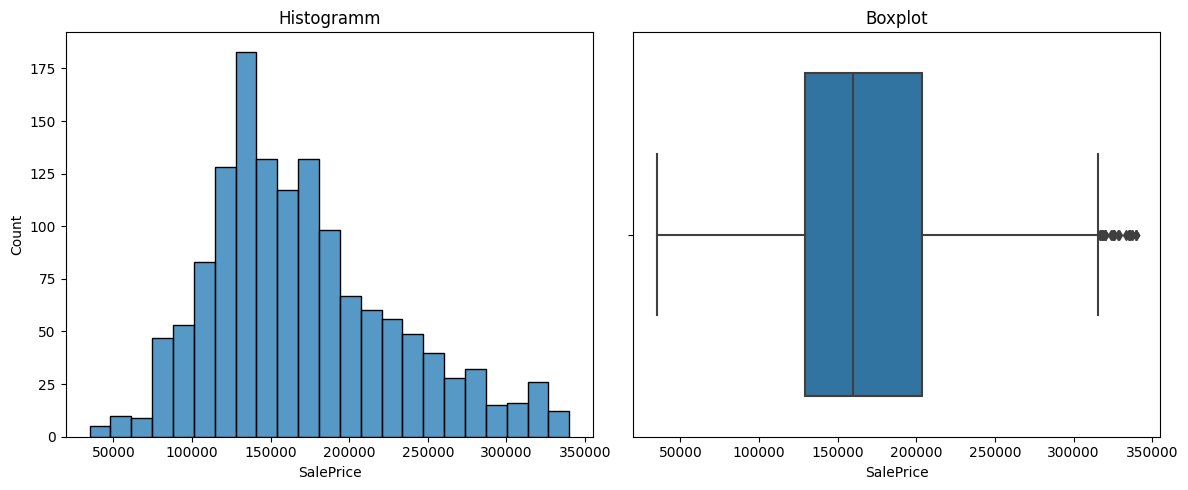

In [68]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.histplot(x = train_hpp_SP1["SalePrice"], ax = axes[0])
axes[0].set_title("Histogramm")

sns.boxplot(x = train_hpp_SP1["SalePrice"], ax = axes[1])
axes[1].set_title("Boxplot")

# show plot
plt.tight_layout()
plt.show()

In [69]:
train_hpp_SP1.SalePrice.describe()

count      1398.000000
mean     170239.085122
std       59251.280782
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203750.000000
max      340000.000000
Name: SalePrice, dtype: float64

In [70]:
X_train_SP1 = train_hpp_SP1.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_SP1 = train_hpp_SP1['SalePrice']

X_test = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)
X_test = X_test.astype(float)
y_test = test_hpp["SalePrice"]

In [71]:
NN_model_SP1 = Sequential()
NN_model_SP1.add(Dense(100, activation = "relu", input_dim = X_train_SP1.shape[1:][0]))
NN_model_SP1.add(Dense(50,activation = "relu"))
NN_model_SP1.add(Dense(1, activation = "linear"))
NN_model_SP1.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history_SP1 = NN_model_SP1.fit(X_train_SP1, y_train_SP1, epochs = 25)

Epoch 1/25
44/44 [==============================] - 1s 2ms/step - loss: 29805084672.0000
Epoch 2/25
44/44 [==============================] - 0s 2ms/step - loss: 19353792512.0000
Epoch 3/25
44/44 [==============================] - 0s 2ms/step - loss: 4583447040.0000
Epoch 4/25
44/44 [==============================] - 0s 2ms/step - loss: 2336613376.0000
Epoch 5/25
44/44 [==============================] - 0s 3ms/step - loss: 2252183296.0000
Epoch 6/25
44/44 [==============================] - 0s 3ms/step - loss: 2172681984.0000
Epoch 7/25
44/44 [==============================] - 0s 2ms/step - loss: 2097379328.0000
Epoch 8/25
44/44 [==============================] - 0s 2ms/step - loss: 2015254144.0000
Epoch 9/25
44/44 [==============================] - 0s 2ms/step - loss: 1931932800.0000
Epoch 10/25
44/44 [==============================] - 0s 3ms/step - loss: 1852883840.0000
Epoch 11/25
44/44 [==============================] - 0s 2ms/step - loss: 1768655744.0000
Epoch 12/25
44/44 [=========

In [72]:
predictions_SP1 = NN_model_SP1.predict(X_test)

pred_actual_SP1 = pd.concat([predicted_values_series_SP1, y_test], axis =  1)
pred_actual_SP1 = pred_actual_SP1.dropna()
print(pred_actual_SP1)

42/42 [==============================] - 0s 2ms/step
      Predicted Values      SalePrice
0        145787.625000  169277.052498
1        197235.656250  187758.393989
2        195545.671875  183583.683570
3        194364.171875  179317.477511
4        164005.296875  150730.079977
...                ...            ...
1315     165187.343750  182164.266854
1316     115710.304688  188137.901598
1317     115319.585938  158893.543063
1318     203919.203125  189579.650668
1319     224510.390625  165229.803506

[1199 rows x 2 columns]


In [73]:
y_pred_SP1 = predictions_SP1

mse_SP1 = mean_squared_error(y_test, y_pred_SP1)

rmse_SP1 = np.sqrt(mse_SP1)

mae_SP1 = mean_absolute_error(y_test, y_pred_SP1)

print("Mean Squared Error (MSE):", mse_SP1)
print("Root Mean Squared Error (RMSE):", rmse_SP1)
print("Mean Absolute Error (MAE):", mae_SP1)

Mean Squared Error (MSE): 2272148125.1893635
Root Mean Squared Error (RMSE): 47667.05492464752
Mean Absolute Error (MAE): 35670.623409943146


## SP2 menghapus nilai SalePrice pada train_hpp yang lebih besar dari nilai maksimal dari SalePrice test_hpp

In [74]:
test_SP_max = test_hpp["SalePrice"].max()
print(test_SP_max)

277936.12694354


In [75]:
train_hpp_SP2 = train_hpp[train_hpp["SalePrice"] < test_SP_max]
train_hpp_SP2.SalePrice.describe()

count      1312.000000
mean     161262.246951
std       49068.314794
min       34900.000000
25%      127000.000000
50%      155000.000000
75%      192000.000000
max      277500.000000
Name: SalePrice, dtype: float64

In [76]:
X_train_SP2 = train_hpp_SP2.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_SP2 = train_hpp_SP2['SalePrice']

X_test = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)
X_test = X_test.astype(float)
y_test = test_hpp["SalePrice"]

In [77]:
NN_model_SP2 = Sequential()
NN_model_SP2.add(Dense(100, activation = "relu", input_dim = X_train_SP2.shape[1:][0]))
NN_model_SP2.add(Dense(50,activation = "relu"))
NN_model_SP2.add(Dense(1, activation = "linear"))
NN_model_SP2.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history_SP2 = NN_model_SP2.fit(X_train_SP2, y_train_SP2, epochs = 25)

Epoch 1/25
41/41 [==============================] - 1s 2ms/step - loss: 26700394496.0000
Epoch 2/25
41/41 [==============================] - 0s 2ms/step - loss: 17306406912.0000
Epoch 3/25
41/41 [==============================] - 0s 2ms/step - loss: 3508643072.0000
Epoch 4/25
41/41 [==============================] - 0s 2ms/step - loss: 1667843200.0000
Epoch 5/25
41/41 [==============================] - 0s 2ms/step - loss: 1605766912.0000
Epoch 6/25
41/41 [==============================] - 0s 2ms/step - loss: 1546010368.0000
Epoch 7/25
41/41 [==============================] - 0s 2ms/step - loss: 1483359488.0000
Epoch 8/25
41/41 [==============================] - 0s 2ms/step - loss: 1418420864.0000
Epoch 9/25
41/41 [==============================] - 0s 2ms/step - loss: 1362541824.0000
Epoch 10/25
41/41 [==============================] - 0s 1ms/step - loss: 1308401536.0000
Epoch 11/25
41/41 [==============================] - 0s 2ms/step - loss: 1261163648.0000
Epoch 12/25
41/41 [=========

In [78]:
predictions_SP2 = NN_model_SP2.predict(X_test)

predicted_values_series_SP2 = pd.Series(predictions_SP2.flatten(), name='Predicted Values')
pred_actual_SP2 = pd.concat([predicted_values_series_SP2, y_test], axis =  1)
pred_actual_SP2 = pred_actual_SP2.dropna()
print(pred_actual_SP2)

42/42 [==============================] - 0s 1ms/step
      Predicted Values      SalePrice
0        143521.234375  169277.052498
1        184928.687500  187758.393989
2        186349.156250  183583.683570
3        185436.171875  179317.477511
4        159562.531250  150730.079977
...                ...            ...
1315     157981.656250  182164.266854
1316     118675.085938  188137.901598
1317     118874.632812  158893.543063
1318     192336.796875  189579.650668
1319     210524.156250  165229.803506

[1199 rows x 2 columns]


In [79]:
y_pred_SP2 = predictions_SP2

mse_SP2 = mean_squared_error(y_test, y_pred_SP2)

rmse_SP2 = np.sqrt(mse_SP2)

mae_SP2 = mean_absolute_error(y_test, y_pred_SP2)

print("Mean Squared Error (MSE):", mse_SP2)
print("Root Mean Squared Error (RMSE):", rmse_SP2)
print("Mean Absolute Error (MAE):", mae_SP2)

Mean Squared Error (MSE): 1517838637.6697886
Root Mean Squared Error (RMSE): 38959.44863149103
Mean Absolute Error (MAE): 30499.96627598869


So far the best are SP2: delete the SalePrice in train_hpp that are bigger as the max SalePrice in test_hpp

## SP3 clean outlier pada train dan test

In [80]:
train_hpp_SP3 = train_hpp_SP1

C:\Users\ZulkifliIndraGadingC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


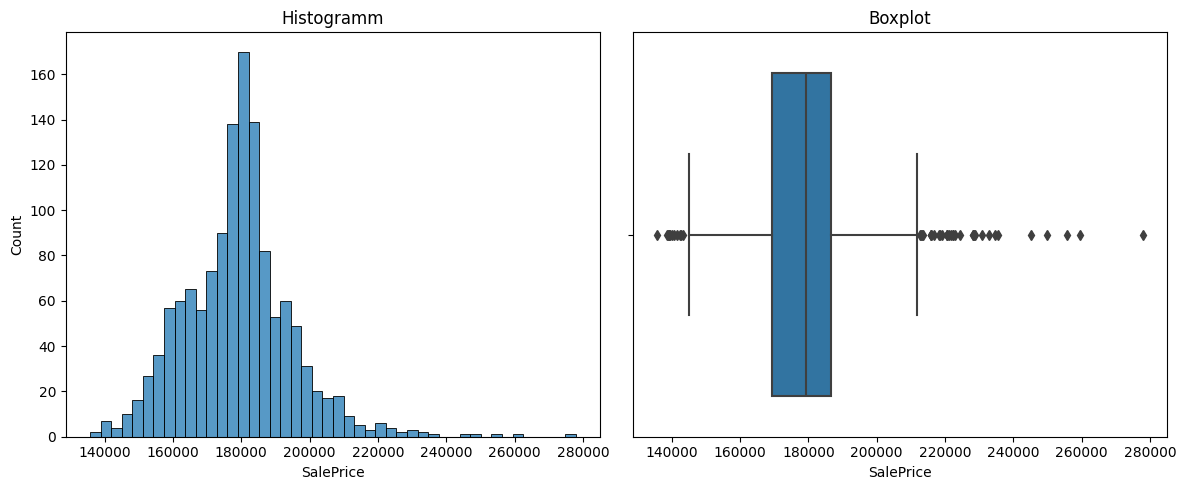

In [81]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

sns.histplot(x = test_hpp["SalePrice"], ax = axes[0])
axes[0].set_title("Histogramm")

sns.boxplot(x = test_hpp["SalePrice"], ax = axes[1])#, bins = 10, kde = True, ax = axes[1])
axes[1].set_title("Boxplot")

# show plot
#sns.set_title("train SalePrice")
plt.tight_layout()
plt.show()

In [82]:
test_hpp.SalePrice.describe()

count      1320.000000
mean     178984.247344
std       15818.201291
min      135751.318893
25%      169266.450745
50%      179288.048361
75%      186538.963233
max      277936.126944
Name: SalePrice, dtype: float64

In [83]:
Q1_SP3_test = test_hpp["SalePrice"].quantile(0.25)
Q3_SP3_test = test_hpp["SalePrice"].quantile(0.75)
IQR_SP3_test = Q3_SP3_test - Q1_SP3_test

upper_limit_SP3_test = Q3_SP3_test + 1.5 * IQR_SP3_test
lower_limit_SP3_test = Q3_SP3_test - 1.5 * IQR_SP3_test
print(lower_limit_SP3_test)
print(upper_limit_SP3_test)

160630.19450040575
212447.73196497123


In [84]:
test_hpp_SP3 = test_hpp[test_hpp["SalePrice"] < upper_limit_SP3_test]
test_hpp_SP3 = test_hpp[test_hpp["SalePrice"] > lower_limit_SP3_test]
test_hpp_SP3.SalePrice.describe()

count      1158.000000
mean     182464.441654
std       13496.827641
min      160713.294603
25%      174388.867433
50%      180982.082617
75%      188189.186794
max      277936.126944
Name: SalePrice, dtype: float64

In [85]:
X_train_SP3 = train_hpp_SP3.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_SP3 = train_hpp_SP3['SalePrice']

X_test_SP3 = test_hpp_SP3.drop(columns = ["Id", "SalePrice"], axis = 1)
X_test_SP3 = X_test_SP3.astype(float)
y_test_SP3 = test_hpp_SP3["SalePrice"]

In [86]:
NN_model_SP3 = Sequential()
NN_model_SP3.add(Dense(100, activation = "relu", input_dim = X_train_SP3.shape[1:][0]))
NN_model_SP3.add(Dense(50,activation = "relu"))
NN_model_SP3.add(Dense(1, activation = "linear"))
NN_model_SP3.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history_SP3 = NN_model_SP3.fit(X_train_SP3, y_train_SP3, epochs = 25)

Epoch 1/25
44/44 [==============================] - 1s 2ms/step - loss: 29736284160.0000
Epoch 2/25
44/44 [==============================] - 0s 2ms/step - loss: 18133565440.0000
Epoch 3/25
44/44 [==============================] - 0s 2ms/step - loss: 3749156608.0000
Epoch 4/25
44/44 [==============================] - 0s 3ms/step - loss: 2374962432.0000
Epoch 5/25
44/44 [==============================] - 0s 3ms/step - loss: 2267625472.0000
Epoch 6/25
44/44 [==============================] - 0s 3ms/step - loss: 2197574656.0000
Epoch 7/25
44/44 [==============================] - 0s 2ms/step - loss: 2109751168.0000
Epoch 8/25
44/44 [==============================] - 0s 3ms/step - loss: 2021779840.0000
Epoch 9/25
44/44 [==============================] - 0s 3ms/step - loss: 1915647872.0000
Epoch 10/25
44/44 [==============================] - 0s 3ms/step - loss: 1825920384.0000
Epoch 11/25
44/44 [==============================] - 0s 2ms/step - loss: 1725437568.0000
Epoch 12/25
44/44 [=========

In [87]:
predictions_SP3 = NN_model_SP3.predict(X_test_SP3)

predicted_values_series_SP3 = pd.Series(predictions_SP3.flatten(), name='Predicted Values')
pred_actual_SP3 = pd.concat([predicted_values_series_SP3, y_test_SP3], axis =  1)
pred_actual_SP3 = pred_actual_SP3.dropna()
print(pred_actual_SP3)

37/37 [==============================] - 0s 2ms/step
      Predicted Values      SalePrice
0        136431.156250  169277.052498
1        187621.109375  187758.393989
2        186479.718750  183583.683570
3        186769.984375  179317.477511
5        172939.078125  177150.989247
...                ...            ...
1153     152817.359375  189562.873697
1154     107487.406250  170591.884966
1155     106813.203125  172934.351683
1156     194646.343750  186425.069879
1157     219026.500000  218648.131133

[911 rows x 2 columns]


In [88]:
y_pred_SP3 = predictions_SP3

mse_SP3 = mean_squared_error(y_test_SP3, y_pred_SP3)

rmse_SP3 = np.sqrt(mse_SP3)

mae_SP3 = mean_absolute_error(y_test_SP3, y_pred_SP3)

print("Mean Squared Error (MSE):", mse_SP3)
print("Root Mean Squared Error (RMSE):", rmse_SP3)
print("Mean Absolute Error (MAE):", mae_SP3)

Mean Squared Error (MSE): 2468234292.346705
Root Mean Squared Error (RMSE): 49681.32740121488
Mean Absolute Error (MAE): 38675.832682657005


### So far our best MAE and RMSE are from SP0

In [89]:
#Summary of MAE and RMSE
error_summary = {'Method': ["SP0", "SP1", "SP2", "SP3"],
                 'RMSE': [rmse, rmse_SP1, rmse_SP2, rmse_SP3],
                 'MAE': [mae, mae_SP1, mae_SP2, mae_SP3]}
error_summary = pd.DataFrame(error_summary)
error_summary

,Method,RMSE,MAE
0,SP0,64999.423331,47981.266733
1,SP1,47667.054925,35670.623410
2,SP2,38959.448631,30499.966276
3,SP3,49681.327401,38675.832683


<Axes: xlabel='RMSE', ylabel='Method'>

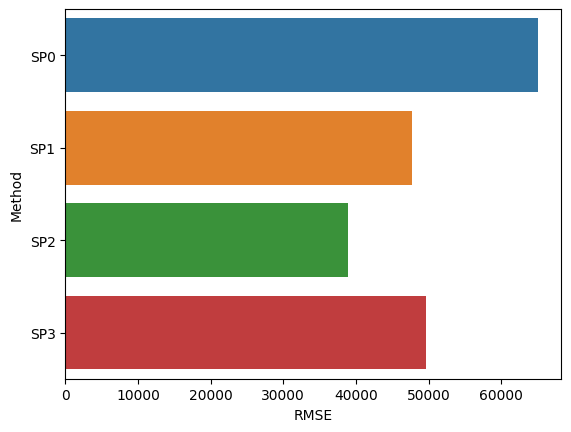

In [90]:
sns.barplot(data = error_summary, y = "Method", x = "RMSE")

<Axes: xlabel='MAE', ylabel='Method'>

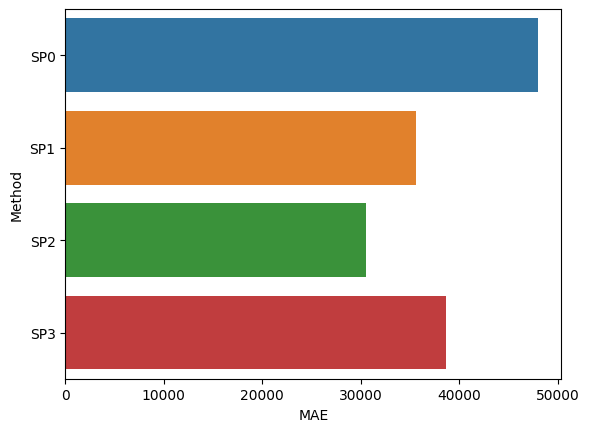

In [91]:
sns.barplot(data = error_summary, y = "Method", x = "MAE")

## Train Test Split

### Train Split

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [115]:
X = train_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y = train_hpp['SalePrice']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
NN_model_split = Sequential()
NN_model_split.add(Dense(100, activation = "relu", input_dim = X_train.shape[1:][0]))
NN_model_split.add(Dense(50,activation = "relu"))
NN_model_split.add(Dense(1, activation = "linear"))
NN_model_split.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history_split = NN_model_split.fit(X_train, y_train, epochs = 25)

Epoch 1/25
37/37 [==============================] - 1s 2ms/step - loss: 37514035200.0000
Epoch 2/25
37/37 [==============================] - 0s 2ms/step - loss: 29102757888.0000
Epoch 3/25
37/37 [==============================] - 0s 2ms/step - loss: 10535622656.0000
Epoch 4/25
37/37 [==============================] - 0s 2ms/step - loss: 4153363712.0000
Epoch 5/25
37/37 [==============================] - 0s 2ms/step - loss: 3995614464.0000
Epoch 6/25
37/37 [==============================] - 0s 2ms/step - loss: 3884705792.0000
Epoch 7/25
37/37 [==============================] - 0s 2ms/step - loss: 3770810880.0000
Epoch 8/25
37/37 [==============================] - 0s 2ms/step - loss: 3666938880.0000
Epoch 9/25
37/37 [==============================] - 0s 2ms/step - loss: 3514869504.0000
Epoch 10/25
37/37 [==============================] - 0s 2ms/step - loss: 3375560704.0000
Epoch 11/25
37/37 [==============================] - 0s 2ms/step - loss: 3224022016.0000
Epoch 12/25
37/37 [========

In [118]:
#train SP1
predictions_train_split = NN_model_split.predict(X_test)

predicted_values_series_train_split = pd.Series(predictions_train_split.flatten(), name = 'Predicted Values')
pred_actual_train_split = pd.concat([predicted_values_series_train_split, y_test], axis =  1)
pred_actual_train_split = pred_actual_train_split.dropna()
print(pred_actual_train_split)

10/10 [==============================] - 0s 2ms/step
     Predicted Values  SalePrice
0       197442.671875   208500.0
3       110634.578125   140000.0
5       283892.437500   143000.0
7       292520.750000   200000.0
19      314212.937500   139000.0
..                ...        ...
251     165933.765625   235000.0
270     161757.312500   266000.0
271     201154.500000   241500.0
284     173576.500000   179200.0
291     242587.296875   135900.0

[66 rows x 2 columns]


In [119]:
#train SP1
y_pred_train = predictions_train_split

mse_train = mean_squared_error(y_test, y_pred_train)

rmse_train = np.sqrt(mse_train)

mae_train = mean_absolute_error(y_test, y_pred_train)

print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)

Mean Squared Error (MSE): 1433373365.412218
Root Mean Squared Error (RMSE): 37859.917662512395
Mean Absolute Error (MAE): 28121.727579195205


#### Test Split SP0

In [125]:
X_tr = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y_tr = test_hpp["SalePrice"]

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2)

In [127]:
NN_model_split_ts = Sequential()
NN_model_split_ts.add(Dense(100, activation = "relu", input_dim = X_train.shape[1:][0]))
NN_model_split_ts.add(Dense(50,activation = "relu"))
NN_model_split_ts.add(Dense(1, activation = "linear"))
NN_model_split_ts.compile(loss = "mse", optimizer = "adam")#, metrics = ['accuracy'])


history_split_ts = NN_model_split_ts.fit(X_train, y_train, epochs = 25)

Epoch 1/25
33/33 [==============================] - 1s 2ms/step - loss: 29457991680.0000
Epoch 2/25
33/33 [==============================] - 0s 1ms/step - loss: 20542031872.0000
Epoch 3/25
33/33 [==============================] - 0s 1ms/step - loss: 6187458048.0000
Epoch 4/25
33/33 [==============================] - 0s 2ms/step - loss: 1268209920.0000
Epoch 5/25
33/33 [==============================] - 0s 1ms/step - loss: 1141002880.0000
Epoch 6/25
33/33 [==============================] - 0s 1ms/step - loss: 1015928960.0000
Epoch 7/25
33/33 [==============================] - 0s 1ms/step - loss: 919784768.0000
Epoch 8/25
33/33 [==============================] - 0s 1ms/step - loss: 804408000.0000
Epoch 9/25
33/33 [==============================] - 0s 1ms/step - loss: 705597376.0000
Epoch 10/25
33/33 [==============================] - 0s 1ms/step - loss: 605570688.0000
Epoch 11/25
33/33 [==============================] - 0s 1ms/step - loss: 514492640.0000
Epoch 12/25
33/33 [==============

In [128]:
#train SP1
predictions_test_split = NN_model_split_ts.predict(X_test)

predicted_values_series_test_split = pd.Series(predictions_test_split.flatten(), name = 'Predicted Values')
pred_actual_test_split = pd.concat([predicted_values_series_test_split, y_test], axis =  1)
pred_actual_test_split = pred_actual_test_split.dropna()
print(pred_actual_test_split)

9/9 [==============================] - 0s 1ms/step
     Predicted Values      SalePrice
1       173476.406250  187758.393989
9       168268.187500  160726.247831
15      169529.562500  179460.965187
17      161813.500000  182352.192645
22      195002.187500  190552.829321
35      172573.078125  152605.298564
51      198097.421875  176521.216976
52      187441.953125  179436.704810
61      172495.656250  179423.751582
64      188841.937500  181122.168677
66      199798.468750  159738.292580
68      159032.421875  174706.363660
70      166355.421875  163602.512173
74      165585.250000  183003.613338
90      173035.265625  155134.227843
104     178140.906250  191736.759806
107     192853.203125  205469.409445
109     187979.546875  182271.503072
129     221308.359375  172088.872656
141     165666.031250  162182.596210
148     180926.156250  160172.727974
150     178733.093750  176515.497545
158     179475.156250  169556.835902
168     173131.515625  177109.589956
174     161563.218750  1

In [129]:
#test SP0
y_pred_test = predictions_test_split

mse_test = mean_squared_error(y_test, y_pred_test)

rmse_test = np.sqrt(mse_test)

mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)

Mean Squared Error (MSE): 116151087.99454619
Root Mean Squared Error (RMSE): 10777.341415884819
Mean Absolute Error (MAE): 8340.645129613655


## Compare the best RF Regressor

#### Compare with RF Regressor SP0

In [130]:
X_train_RF = train_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_RF = train_hpp['SalePrice']

X_test_RF = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y_test_RF = test_hpp["SalePrice"]

In [138]:
from sklearn.ensemble import RandomForestRegressor

# Inisialization model Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50)
# fit the RF model
rf_regressor.fit(X_train_RF, y_train_RF)


RandomForestRegressor(n_estimators=50)

In [139]:
#predict
y_pred_RF = rf_regressor.predict(X_test_RF)

# Evaluate the model
mse_RF = mean_squared_error(y_test_RF, y_pred_RF)
rmse_RF = np.sqrt(mse_RF)
mae_RF = mean_absolute_error(y_test_RF, y_pred_RF)

# Show result evaluation
print(f'Mean Squared Error (MSE): {mse_RF:.2f}')
print(f'Mean Squared Error (RMSE): {rmse_RF:.2f}')
print(f'Mean Absolute Error (MAE): {mae_RF:.2f}')

Mean Squared Error (MSE): 4813494539.26
Mean Squared Error (RMSE): 69379.35
Mean Absolute Error (MAE): 52194.73


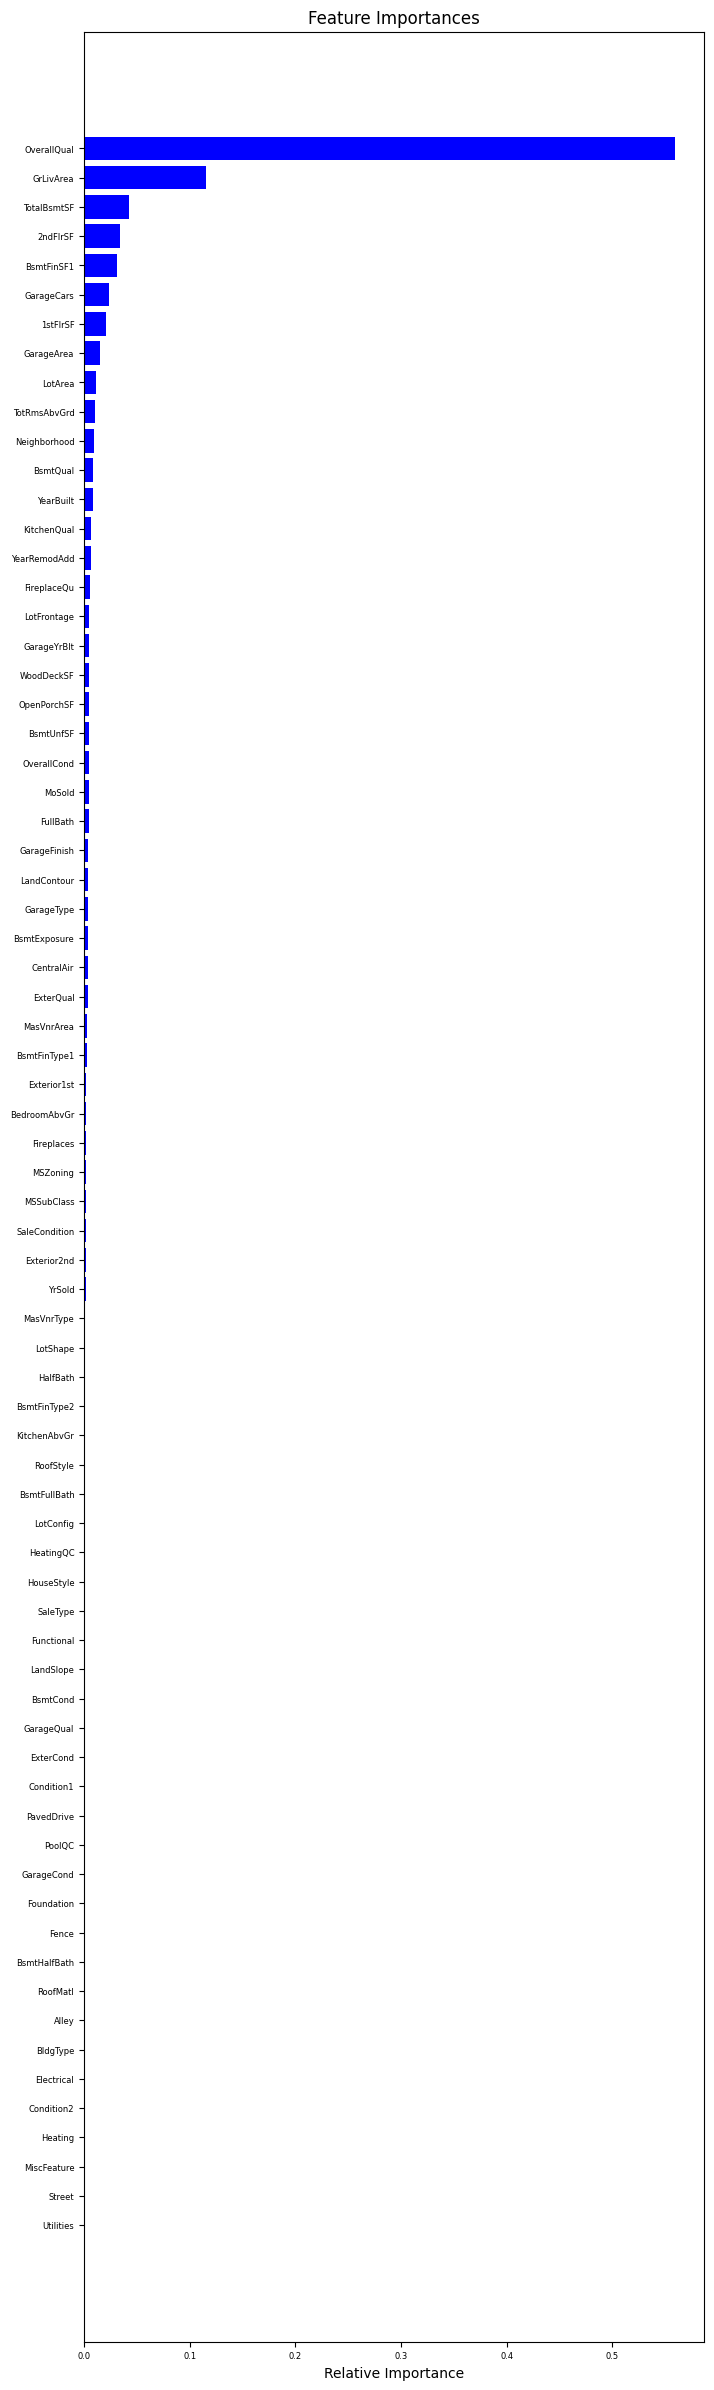

In [121]:
features_RF = list(X_train_RF.columns)
importances_RF = rf_regressor.feature_importances_
indices_RF = np.argsort(importances_RF)

plt.figure(figsize=(8,30))
plt.title('Feature Importances')
plt.barh(range(len(indices_RF)), importances_RF[indices_RF], color='b', align='center')
plt.yticks(range(len(indices_RF)), [features_RF[i] for i in indices_RF])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=6)
plt.show()

#### Compare with RF SP1

In [140]:
X_train_RF_SP1 = train_hpp_SP1.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_RF_SP1 = train_hpp_SP1['SalePrice']

X_test_RF_SP1 = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y_test_RF_SP1 = test_hpp["SalePrice"]

In [141]:
rf_regressor_SP1 = RandomForestRegressor(n_estimators=50)

rf_regressor_SP1.fit(X_train_RF_SP1, y_train_RF_SP1)

RandomForestRegressor(n_estimators=50)

In [142]:
y_pred_RF_SP1 = rf_regressor_SP1.predict(X_test_RF_SP1)

mse_RF_SP1 = mean_squared_error(y_test_RF_SP1, y_pred_RF_SP1)
rmse_RF_SP1 = np.sqrt(mse_RF_SP1)
mae_RF_SP1 = mean_absolute_error(y_test_RF_SP1, y_pred_RF_SP1)

print(f'Mean Squared Error (MSE): {mse_RF_SP1:.2f}')
print(f'Mean Squared Error (RMSE): {rmse_RF_SP1:.2f}')
print(f'Mean Absolute Error (MAE): {mae_RF_SP1:.2f}')

Mean Squared Error (MSE): 3049457492.58
Mean Squared Error (RMSE): 55221.89
Mean Absolute Error (MAE): 46245.42


#### Compare with RF SP2

In [143]:
X_train_RF_SP2 = train_hpp_SP2.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_RF_SP2 = train_hpp_SP2['SalePrice']

X_test_RF_SP2 = test_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y_test_RF_SP2 = test_hpp["SalePrice"]

In [144]:
# Inisialization model Random Forest Regressor
rf_regressor_SP2 = RandomForestRegressor(n_estimators=50)
# fit the RF model
rf_regressor_SP2.fit(X_train_RF_SP2, y_train_RF_SP2)

RandomForestRegressor(n_estimators=50)

In [145]:
# predict
y_pred_RF_SP2 = rf_regressor_SP2.predict(X_test_RF_SP2)

# Evaluate the model
mse_RF_SP2 = mean_squared_error(y_test_RF_SP2, y_pred_RF_SP2)
rmse_RF_SP2 = np.sqrt(mse_RF_SP2)
mae_RF_SP2 = mean_absolute_error(y_test_RF_SP2, y_pred_RF_SP2)

# Show the result evaluate
print(f'Mean Squared Error (MSE): {mse_RF_SP2:.2f}')
print(f'Mean Squared Error (RMSE): {rmse_RF_SP2:.2f}')
print(f'Mean Absolute Error (MAE): {mae_RF_SP2:.2f}')

Mean Squared Error (MSE): 2082168334.13
Mean Squared Error (RMSE): 45630.78
Mean Absolute Error (MAE): 39828.79


#### Compare with RF SP3

In [149]:
X_train_RF_SP3 = train_hpp_SP3.drop(columns = ["Id", "SalePrice"], axis = 1)

y_train_RF_SP3 = train_hpp_SP3['SalePrice']

X_test_RF_SP3 = test_hpp_SP3.drop(columns = ["Id", "SalePrice"], axis = 1)

y_test_RF_SP3 = test_hpp_SP3["SalePrice"]

In [150]:
# Inisialization model Random Forest Regressor
rf_regressor_SP3 = RandomForestRegressor(n_estimators=50)
# Fit the model
rf_regressor_SP3.fit(X_train_RF_SP3, y_train_RF_SP3)

RandomForestRegressor(n_estimators=50)

In [151]:
# Predict
y_pred_RF_SP3 = rf_regressor_SP3.predict(X_test_RF_SP3)

# Evaluate the model
mse_RF_SP3 = mean_squared_error(y_test_RF_SP3, y_pred_RF_SP3)
rmse_RF_SP3 = np.sqrt(mse_RF_SP3)
mae_RF_SP3 = mean_absolute_error(y_test_RF_SP3, y_pred_RF_SP3)

# Show the model evaluate
print(f'Mean Squared Error (MSE): {mse_RF_SP3:.2f}')
print(f'Mean Squared Error (RMSE): {rmse_RF_SP3:.2f}')
print(f'Mean Absolute Error (MAE): {mae_RF_SP3:.2f}')

Mean Squared Error (MSE): 3063641777.44
Mean Squared Error (RMSE): 55350.17
Mean Absolute Error (MAE): 46111.43


### Summary of RF

In [152]:
#Summary of MAE and RMSE RF
error_summary_RF = {'Method': ["SP0", "SP1", "SP2", "SP3"],
                    'RMSE_RF': [rmse_RF, rmse_RF_SP1, rmse_RF_SP2, rmse_RF_SP3],
                    'MAE_RF': [mae_RF, mae_RF_SP1, mae_RF_SP2, mae_RF_SP3]}#,
                    #'R2_RF': [r2_RF, r2_RF_SP1, r2_RF_SP2, r2_RF_SP3]}
error_summary_RF = pd.DataFrame(error_summary_RF)
error_summary_RF

,Method,RMSE_RF,MAE_RF
0,SP0,69379.352399,52194.729744
1,SP1,55221.893236,46245.416961
2,SP2,45630.782747,39828.790284
3,SP3,55350.174141,46111.434185


<Axes: xlabel='RMSE_RF', ylabel='Method'>

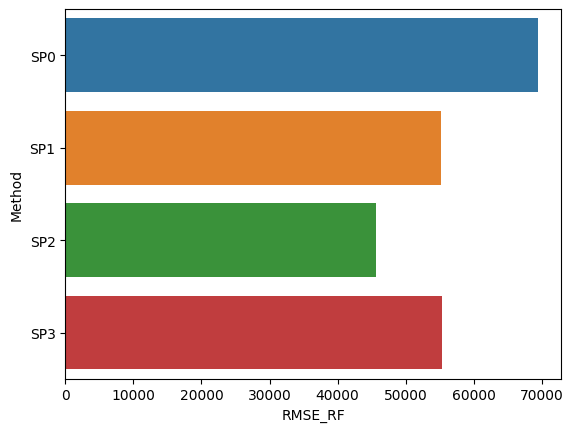

In [153]:
sns.barplot(data = error_summary_RF, y = "Method", x = "RMSE_RF")

<Axes: xlabel='MAE_RF', ylabel='Method'>

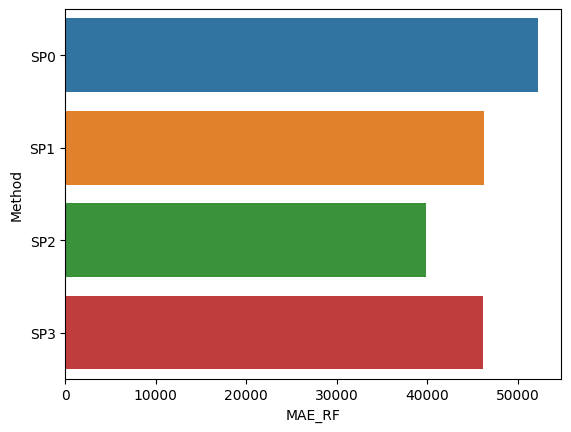

In [154]:
sns.barplot(data = error_summary_RF, y = "Method", x = "MAE_RF")

### RF with train test split

In [230]:
X = train_hpp.drop(columns = ["Id", "SalePrice"], axis = 1)

y = train_hpp['SalePrice']


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [232]:
# Inisialization model Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=50)
# Fit the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [233]:
# Predicat
y_pred = rf_regressor.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# show the result evaluate
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Squared Error (MSE): 587835283.48
Mean Squared Error (RMSE): 24245.31
Mean Absolute Error (MAE): 16497.42
